## **Predicting Diagnosis Of Heart Disease**

### Introduction

Heart disease has been the leading cause of death in many countries. The term heart disease describes a range of conditions that could affect the heart. The most common heart diseases are coronary heart disease, peripheral artery disease, and aortic disease (CDC,2023).
Studies show that the leading risk factors for these diseases include cholesterol levels, maximum heart rate, blood pressure, age, and more. In particular, adults ages 65 and older are more likely to suffer from heart disease than the young because aging may cause changes in the heart and blood vessels, which can increase a person's risk of developing cardiovascular disease (U.S. Department of Health, n.d.). Consequently, our goal is to identify which heart health indicators most significantly contribute to the identification of heart disease, and use the knn classifier algorithm to classify an individual as either likely or not likely to have heart disease based off the predictors. In other words, we want to use the information variables we already know and try to predict information we dont know. We want to predict whether if someone who have certain symptoms could also mean that they could likely have heart disease

Thus, making our research question:
**Which predictors best correlates with the characterization of heart disease and can these predictors be used to build an accurate classification model to predict whether a new patient is likely to have heart disease?**

This classification uses processed.cleveland.data retrieved from the *UCI Machine Learning Repository: Heart Disease Database* to predict if a new patient is likely to have heart disease. 

### Methods & Results
*Preprocessing and exploratory data analysis*

1. Import the dataset from the internet onto jupyter notebook. This is using read_csv to import the processed.cleveland.data dataset from the online directory.

2. Tidy the dataset to make it usable. There are many properties of the dataset that needs to be tidied. 

3. Use GGPairs and box plots to determine the best predictors.

4. Summarize the training set to make predictions about how we want our classifier to work. This is done by grouping by diagnosis, and summarize the mean of all of the numeric columns.

5. Split the data into training and testing sets, working only with the training set until the very end. We will create models to learn to predict a target variable based on other variables.

6. Create a classification model using chosen predictors and get the accuracy of our model. To find the accuracy of the model, we will do fine-tuning to prove that the model created works well and use cross validation to make sure it can work on unseen data.

7. Visualize classifier


### **1. Reading the Libraries into JupyterHub**

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Loading Dataset into JupyterHub

In [2]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <- read_csv(url, c("age", "sex", "cp", "blood_pressure", "cholesterol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, blood_pressure, cholesterol, fbs, restecg, thalach, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


The data consists of 14 attributes:

1. `age`: age of the patient (years)
2. `sex`: sex of the patient (M: Male, F: Female)
3. `cp`: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
4. `trestbps`: resting blood pressure (#)
5. `chol`: serum cholesterol in mg/dl (#)
6. `fbs`: fasting blood sugar > 120 mg/dl (Binary)(1=true; 0=false)
7. `restecg`: resting electrocardiography results (values 0,1,2)
8. `thalach`: maximum heart rate achieved (#)
9. `exang`: exercise induced angina (Binary) (1 = yes; 0 = no)
10. `oldpeak`: oldpeak = ST (Numeric value measured in depression)
11. `slope`: of the peak exercise ST segment (Ordinal)(Value 1: up sloping , Value 2: flat , Value 3: down sloping)
12. `ca`: number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. `thal`: maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect
14. `num` (the predicted attribute)

The predicted attribute for the diagnosis of heart disease is `num`. According to the dataset description on *UCI Heart Disease Database*, the diagnosis of heart disease is an angiographic disease status. The angiographic disease status is defined as a binary label (diseased or not) based on the fact if there is more than 50% diameter narrowing in any of the major blood vessels in a patient (Balashankar et al., 2021). Therefore, in this project, a value of 0 suggests less than 50% diameter narrowing in blood vessels, which indicates the patient is not likely to have heart disease. A value of 1 suggests greater than 50% diameter narrowing in blood vessels, which indicates the patient is likely to have heart disease. 

### **2. Tidying and Wrangling Data**


### Check Missing Values

Missing values in this dataset are represented by "?". To check for missing values, we will first be replacing "?" with NA. Then, we will sum all the NA in each column together by using the `summarise_all` function. The table below shows the number of missing values in the entire dataset. Although there are missing values in the `ca` and `thal` columns, they can be ignored because only numerical variables will be considered for this project. 


In [3]:
data[data == "?" ] <- NA 
data |>
  select(everything()) |>
  summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,4,2,0


### Tidying Data

The predicted attribute is the `num` column which indicates the diagnosis of heart disease. According to the data description, a value of 0 represents no presence of heart disease; any value that is not 0 represents presence of heart disease. To change the predicted attribute to be categorical, the `ifelse` function was used to convert any non-zero numbers to 1. The final result of the prediction is now either 0 (not likely to have heart disease) or 1 (likely to have heart disease). In addition, all the values in the data are numeric, even the categorical variables. Therefore, to change the numerical values within the categorical variables into factors, the `as.factor` function will be used.

In [4]:

cleve_clean <- data |>
    mutate(diagnosis = ifelse(num >= 1, 1, 0), diagnosis = as.factor(diagnosis), sex = as.factor(sex), 
           fbs= as.factor(fbs), restecg=as.factor(restecg), exang = as.factor(exang),
           thal = as.factor(thal), ca = as.factor(ca), 
           slope = as.factor(slope)) |>
    select(-num) 

cleve_clean

age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1


### Selecting Only the Numeric Variables

To create our classification, only numeric variables will be considered.

In [5]:
cleve_numeric <- cleve_clean |>
select(age, blood_pressure, cholesterol, thalach, oldpeak, diagnosis) 
cleve_numeric

age,blood_pressure,cholesterol,thalach,oldpeak,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,0
67,160,286,108,1.5,1
67,120,229,129,2.6,1
37,130,250,187,3.5,0
41,130,204,172,1.4,0
56,120,236,178,0.8,0
62,140,268,160,3.6,1
57,120,354,163,0.6,0
63,130,254,147,1.4,1


### **3. Summarizing Data**

Since the goal is to create a classification model, we are only going to consider numerical variables. Hence, we are calculating the mean of all numerical variables. To do this, we will use `group_by` and `summarize` to create a table with mean of all numeric variables. A new column called `patient_count` was created to count the number of patients who are likely or not likely to have heart disease. 

In [6]:
#summarizing data

summarize_all <- cleve_numeric |>
                    group_by(diagnosis) |>
                    summarize(age = mean(age),
                              blood_pressure = mean(blood_pressure),
                              cholesterol = mean(cholesterol),
                              thalach = mean(thalach),
                              oldpeak = mean(oldpeak),
                              patient_count = n())

summarize_all

diagnosis,age,blood_pressure,cholesterol,thalach,oldpeak,patient_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,52.58537,129.2500,242.6402,158.378,0.5865854,164
1,56.62590,134.5683,251.4748,139.259,1.5741007,139


### **4. Visualizing Data Using ggpairs** 

For our visualization, we will be using `ggpairs` to visually check for a possible relationship between the numeric variables. The `ggpairs` function will also be used to observe the correlation between the attributes. After using these plots we can then identify which parameters are more indicative compared to others.  Specifically, the `ggpairs` function will help us produce a plot matrix of all variables of interest which we can then utilize to find the best predictors to use. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



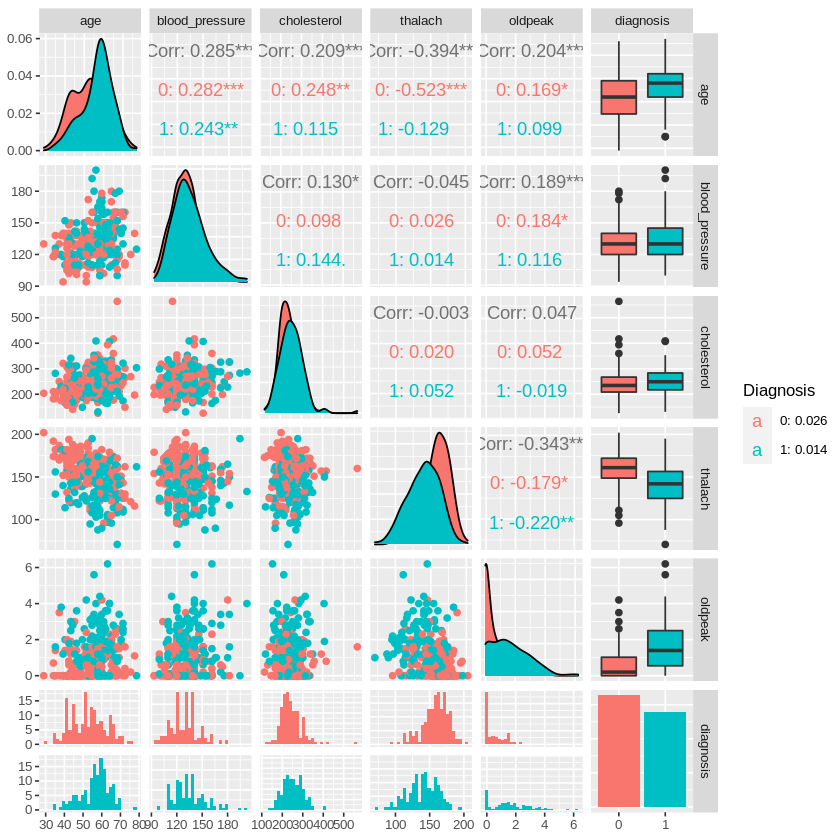

In [7]:
ggpairsplot <- cleve_numeric |>
ggpairs(legend= 10, columns = 1:6, aes(color = diagnosis)) +
 labs(color="Diagnosis")+

          theme(plot.title = element_text(hjust = 1),
                axis.text.x = element_text(hjust = 1, color = "black",size=5),
                axis.text.y = element_text(hjust = 1, color = "black",size=5),
                legend.position = "bottom")+
        　 
          theme_grey(base_size = 10)
ggpairsplot

### Using ggpairs plot to choose predictors

To choose a predictor, we want to see how diagnosis correlates with a predictor of interest. In the ggpairs plot above, we will focus on the diagnosis column and choose our predictors based on these box plots, which shows how diagnosis correlates with each of the variables. By looking at the boxplot graphs we can see that `thalach`, `age`, `oldpeak` and `blood_pressure` have the most difference in the boxes for their respective diagnosis. Take age as an example, people who have heart disease tend to be slightly older than people who do not. However, it is not significant because there is overlap, but the plot clearly shows a clear difference. However, the only boxplot which seems to have almost complete overlap is for `cholesterol`, suggesting there is little difference in cholesterol levels in patients who have and do not have heart disease. Removing `cholesterol` as a predictor might improve the accuracy of the model since there is little to no correlation between this variable and diagnosis. 

To this effect, two classifications will be performed. One with only four variables, `age` `oldpeak` `thalach` `blood_pressure`, and without `cholesterol`. And a second classification with all five variables `age`, `oldpeak`, `thalach`, `blood_pressure` and `cholesterol` as the predictor. We will test two different classifications and compare the accuracy. 

### **5. Splitting the Data**

Using the `initial_split()` function to split the data into a training and test set. Then Set the strata argument to the target variable. Note: we put the test set aside for now.

In [8]:
#splitting data
cleve_split <- initial_split(cleve_numeric, prop = 0.75, strata = diagnosis)

cleve_training <- training(cleve_split)
cleve_testing <- testing(cleve_split)


### **6. Classification 1: Using `age` `thalach` `oldpeaks` `blood_pressure` as predictors**

The overall workflow for performing K-nearest neighbor classification using tidymodels is as follows:

1. Create a recipe that specifies the target and predictor variables, as well as pre-processing steps for all variables. Pass the training data as the data argument of the recipe.

2. Use the `vfold_cv()` function to split up the training data for cross validation.

3. Create a nearest_neighbors model specification, with `neighbors = tune()`.

4. Add the recipe and model specification to a workflow(), and use the `tune_grid()` function on the train/validation splits to estimate the classifier accuracy for a range of values.

5. Pick a value that yields a high accuracy estimate which does not change much if you change to a nearby value. In the K-nearest neighbors classification algorithm, we choose the label/class for a new observation by taking the mode (value that appears most often, i.e., the majority vote) label/class of the K nearest neighbors.

6. Make a new model specification for the best parameter value, and re-train the classifier using the `fit()` function.

7. Evaluate the estimated accuracy of the classifier on the test set using the predict function.

In [9]:
# step 1. Create a recipe that specifies the target and predictor variables

set.seed(113)

cleve_recipe <- recipe(diagnosis ~ age + thalach + oldpeak + blood_pressure, data = cleve_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
cleve_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [10]:
# neighbors = tune() is used when we want to test the accuracies for a range of different parameter values.
set.seed(113)

# step 2-3. Use the vfold_cv() function to split up the training data for cross validation and create a nearest_neighbors model specification, with neighbors = tune()
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

cleve_vfold <- vfold_cv(cleve_training, v = 10, strata = diagnosis)

gridvals <- tibble(neighbors = seq(1, 50)) 

#step 4. Add the recipe and model specification to a workflow(), and use the tune_grid()
cleve_result <- workflow() |>
       add_recipe(cleve_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = cleve_vfold, grid = gridvals) |>
      collect_metrics() |>
        filter(.metric == "accuracy")


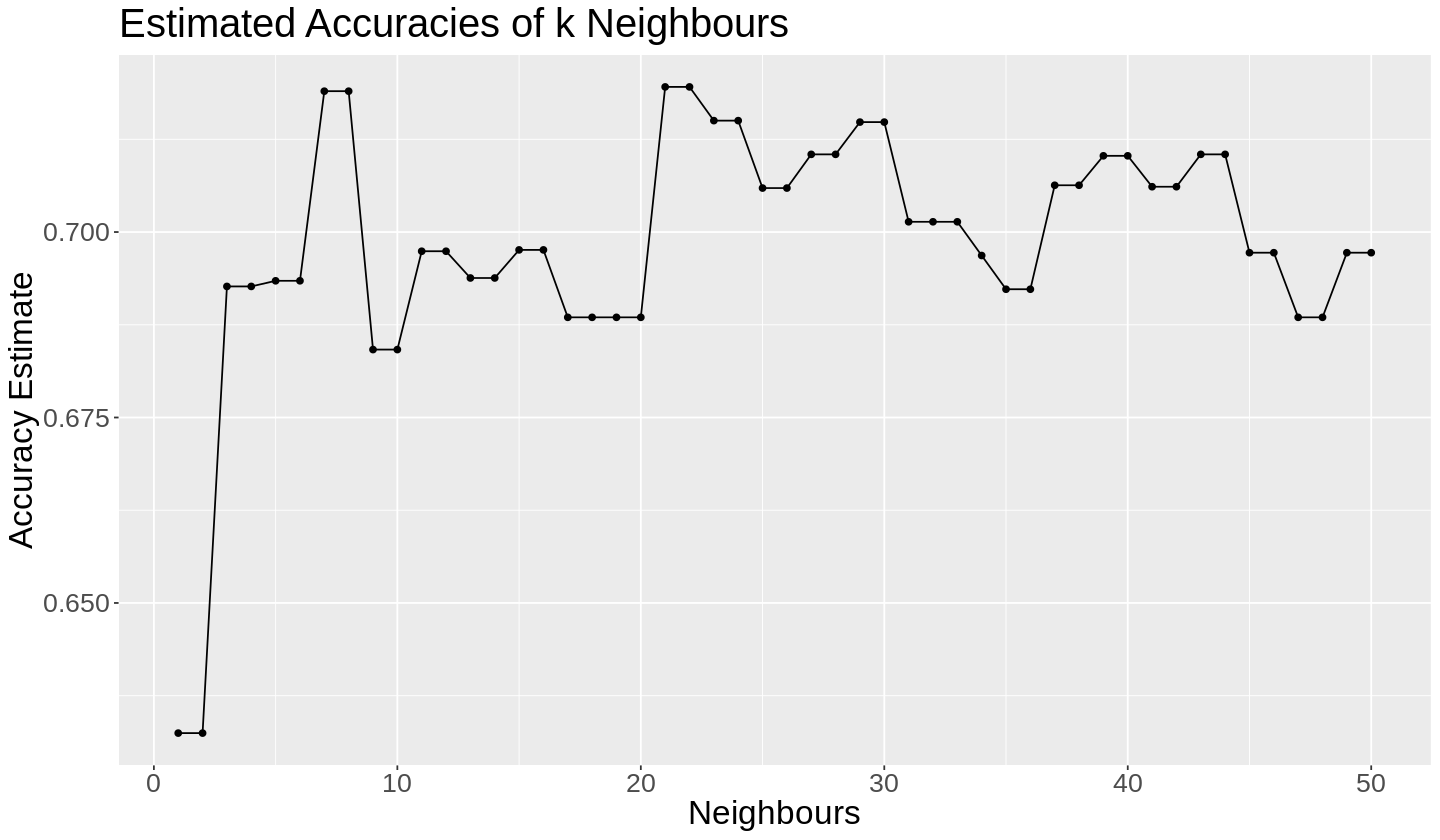

In [11]:
#Estimating accuracies of k neighbours using geom_point plot
set.seed(113)
options(repr.plot.width = 12, repr.plot.height = 7)

#steps 5. Create a accuracy vs k neighbors plot and pick a value of that yields a high accuracy estimate

cleve_cv_plot <- cleve_result |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours",
         y = "Accuracy Estimate",
         title = "Estimated Accuracies of k Neighbours") +
    theme(text = element_text(size = 20))
cleve_cv_plot

**Testing for Accuracy on Testing Set**

In [12]:
set.seed(113)
# according to the graph above, the number of k that gives the highest accurcy is k=50. 
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 50) |>
  set_engine("kknn") |>
  set_mode("classification")

#step 6. Make a new model specification for the best parameter value, and re-train the classifier using the fit() function.

cleve_fit <- workflow() |>
  add_recipe(cleve_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = cleve_training)

cleve_prediction <- predict(cleve_fit, cleve_testing) |> 
    bind_cols(cleve_testing)

#step 7. Evaluate the estimated accuracy of the classifier on the test set using the predict function

cleve_acc <- cleve_prediction |> 
    metrics(truth = diagnosis, estimate = .pred_class) |>
    select(.metric, .estimate) |> 
    head(1)
cleve_acc


cleve_cm <- cleve_prediction |> 
    conf_mat(truth = diagnosis, estimate = .pred_class)
cleve_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.7763158


          Truth
Prediction  0  1
         0 35 11
         1  6 24

Based on the confusion matrix, we can conclude that our classifier has made 54 correct predictions out of 76 observations, giving us an accuracy of approximately 71.0526% as stated above.

### **Classification 2: Using `age` `thalach` `oldpeaks` `blood_pressure` `cholesterol` as predictors**

What would happen to the accuracy if we included `cholesterol`?

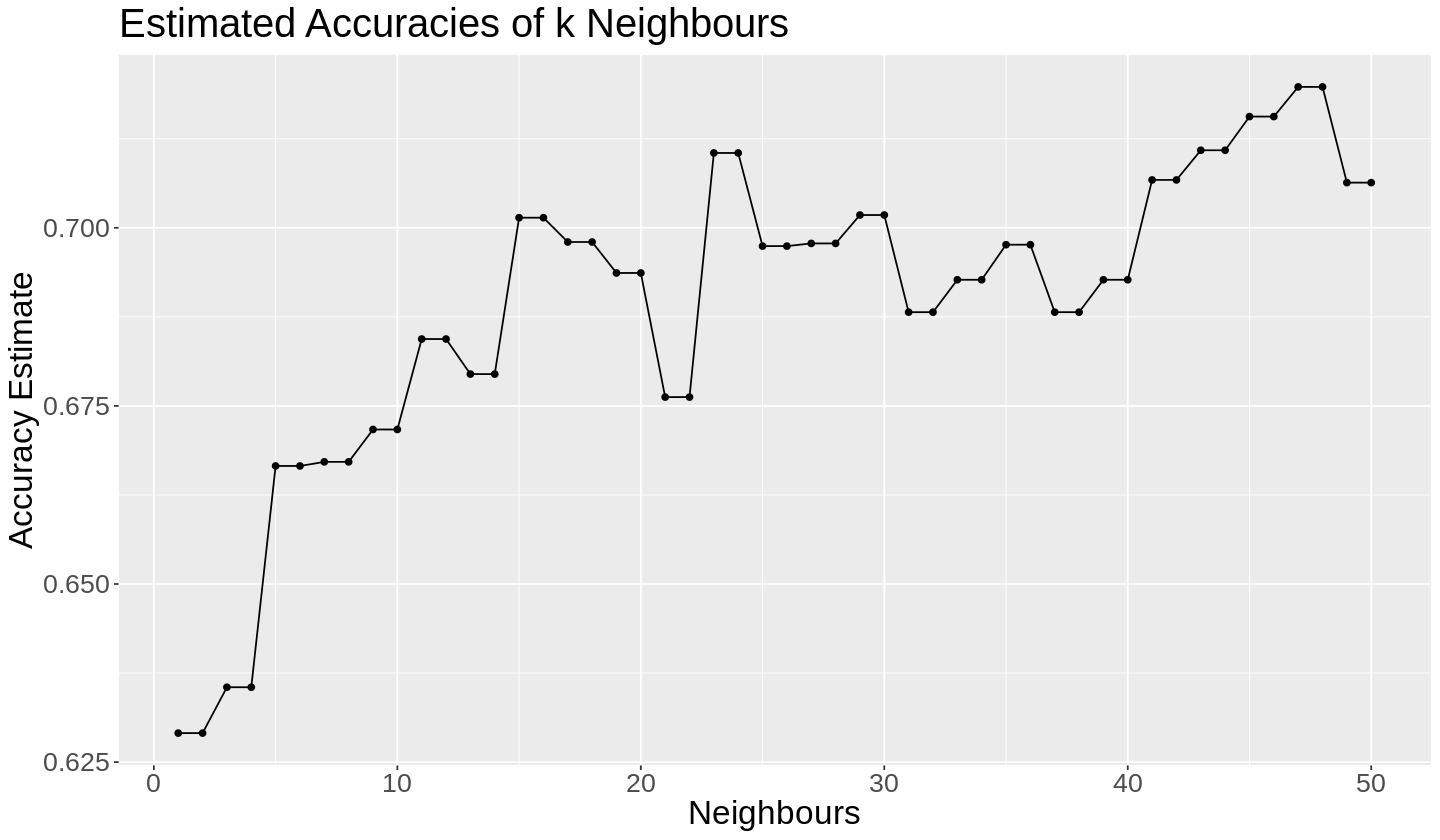

In [13]:
set.seed(113)

cleve_recipe_2 <- recipe(diagnosis ~ age + thalach + oldpeak + blood_pressure + cholesterol, data = cleve_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

cleve_vfold_2 <- vfold_cv(cleve_training, v = 10, strata = diagnosis)

gridvals_2 <- tibble(neighbors = seq(1, 50)) 

cleve_result_2 <- workflow() |>
       add_recipe(cleve_recipe_2) |>
       add_model(knn_spec_2) |>
       tune_grid(resamples = cleve_vfold_2, grid = gridvals_2) |>
      collect_metrics() |>
        filter(.metric == "accuracy")


cleve_cv_plot_2 <- cleve_result_2 |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours",
         y = "Accuracy Estimate",
         title = "Estimated Accuracies of k Neighbours") +
    theme(text = element_text(size = 20))
cleve_cv_plot_2



In [14]:
set.seed(113) 

knn_best_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
  set_engine("kknn") |>
  set_mode("classification")

cleve_fit_2 <- workflow() |>
  add_recipe(cleve_recipe_2) |>
  add_model(knn_best_spec_2) |>
  fit(data = cleve_training)

cleve_prediction_2 <- predict(cleve_fit_2, cleve_testing) |> 
    bind_cols(cleve_testing)


cleve_acc_2 <- cleve_prediction_2 |> 
    metrics(truth = diagnosis, estimate = .pred_class) |>
    select(.metric, .estimate) |> 
    head(1)
cleve_acc_2


cleve_cm_2 <- cleve_prediction_2 |> 
    conf_mat(truth = diagnosis, estimate = .pred_class)
cleve_cm_2

.metric,.estimate
<chr>,<dbl>
accuracy,0.7368421


          Truth
Prediction  0  1
         0 33 12
         1  8 23

If we included `cholesterol` in our classification, the accuracy decreases by 5.2631%. This is a drastic drop in accuracy, therefore is it better to exclude `cholesterol` as a predictor. Based on the confusion matrix for this classification, we can conclude that our classifier has made 50 correct predictions out of 76 observations, giving us an accuracy of approximately 65.7895% as stated above.

### **7. Testing for Overplotting or Underplotting and Visualizing Classifier**

Test if model is doing a good job using the two most important predictors to classify. According to our ggpairs plot previously, it is determined that `age` and `thalach` correlates with diagnosis the most. Thus, we will use these two variables to show how the model is clustering. The `stat_ellipse` function is used to put a circle around where the variables are clustering. 

In the graph below, we can clearly see some clustering. All the orange points (representing patients who are likely to have heart disease) in one area and all the blues points (representing patients who are not likely to have heart disease) are in another area. Importantly, there is very little overlap between the two variables. We do not want areas of overlap since it signifies when the model cannot do a good job of separating the two variables clearly.


In [15]:
newoldpeak <- cleve_numeric |>
select(oldpeak

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: newoldpeak <- cleve_numeric |>
2: select(oldpeak
  ^


In [ ]:

are_grid <- seq(min(cleve_numeric$age), 
                max(cleve_numeric$age))

smo_grid <- seq(min(cleve_numeric$thalach), 
                max(cleve_numeric$thalach), 
                length.out = 100)#

asgrid <- as_tibble(expand.grid(age = are_grid, 
                                thalach = smo_grid))#

cleve_recipe2 <- recipe(diagnosis ~ age + thalach, data = cleve_training) |>
    step_scale(all_predictors()) |>
   step_center(all_predictors())
cleve_recipe2

cleve_fit <- workflow() |>
  add_recipe(cleve_recipe2) |>
 add_model(knn_best_spec) |>
fit(data = cleve_training)

knnPredGrid <- predict(cleve_fit, asgrid)


prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
 rename(diagnosis = .pred_class)


wkflw_plot <-
 ggplot() +
geom_point(data = cleve_clean, 
         mapping = aes(x = age,
                      y = thalach,
                      color = diagnosis), 
       alpha = 0.75) +
geom_point(data = prediction_table, 
          mapping = aes(x = age, 
                     y = thalach, 
                      color = diagnosis), 
         alpha = 0.02, 
          size = 5) +
labs(color = "Diagnosis", 
   x = "ST Depression (standarized)", 
   y = "Max Heart Rate (standardized)") +
scale_color_manual(labels = c("Likely to have heart disease", "Not likely to have heart disease"), 
                  values = c("orange2", "steelblue2")) +
theme(text = element_text(size = 12)) +
stat_ellipse(data = prediction_table, 
        mapping = aes(x = age, 
                 y = thalach, 
            color = diagnosis))

wkflw_plot

## **Discussion**

### Summary of Findings

To create our classification model, only numerical variables have been considered. There are 5 total numerical variables. `age`, `thalach`, `blood_pressure`, `cholesterol` and `oldpeak`. However, a classification with four variables of `age`, `thalach`, `blood_pressure` and `oldpeak` yielded a higher accuracy. The model without `cholesterol` leads to a higher accuracy because there is little difference in cholesterol levels in patients who have and do not have heart disease. Removing cholesterol as a predictor improves the accuracy of the model since there is little to no correlation between this variable and diagnosis.

According to the four numerical variables, `age`, `thalach`, `blood_pressure` and `oldpeak`, this project performed a K-nn classification and calculated the accuracy of our predictions. We first analyzed the data to explore the correlation between the numeric variables and whether the patient is likely or not likely to have heart disease. Considering the visualizations between the predictors and target variables depicted in ggpairs and box plots, it is deduced that all variables except for `cholesterol` have a relatively strong relationship with the target variable. Therefore, we performed a KNN classification with these four variables as our classifier and the result displayed the accuracy of 0.710526.

**NEW**
Certain risk factors can be used to determine the likelihood of a person developing heart disease, and the resulting classification model may be used to determine if someone has heart disease or not based on these factors. To create our classification model, only numerical variables have been considered. There is a total of 5 numerical variables. `age`, `thalach`, `blood_pressure`, `cholesterol` and `oldpeak`. However, a classification with four variables of `age`, `thalach`, `blood_pressure` and `oldpeak` yielded a higher accuracy. The model without `cholesterol` leads to a higher accuracy because there is little difference in cholesterol levels in patients who have and do not have heart disease. Removing cholesterol as a predictor improves the model's accuracy since there is little to no correlation between this variable and diagnosis. According to the four numerical variables, `age`, `thalach`, `blood_pressure` and `oldpeak`, this project performed a K-nn classification and calculated the accuracy of our predictions. We first analyzed the data to explore the correlation between the numeric variables and whether the patient is likely or not likely to have heart disease. Considering the visualizations between the predictors and target variables depicted in ggpairs and box plots, it is deduced that all variables except for `cholesterol` have a relatively strong relationship with the target variable. Therefore, we performed a KNN classification with these four variables as our classifier and the result displayed the accuracy of 0.710526 after 10-fold cross-validation. The accuracy of our model is good for a basic classification model, however the accuracy is not high enough for us to use, given that false classifications can have severe consequences.

### Expected Results?

The results of this project did not align with our expectations. Initially, we predicted that cholesterol and blood pressure would be the two variables that best correlate to the identification of heart disease. However, through more detailed data analysis by creating a ggpairs plot to compare correlation coefficients between the variables, we concluded that age, thalach, blood_pressure, and oldpeak ultimately best characterizes the presence of heart disease. The impact shows that the current variables in this dataset cannot give a high enough confidence in terms of predicting heart disease since there is a 29 percent chance of error. This means that using the variables within our dataset to predict heart disease should not be used as the only source, and other methods or variables should be considered.

Many factors that could have affected the accuracy of the classifier. First, as seen in the ggpairs plot in the data analysis section, none of the correlation coefficients of the diagnosis labels exceeds ±0.25. When the correlation coefficient is near 1 or −1, the linear relationship is strong; when it is near 0, the linear relationship is weak. A coefficient of ±0.25 does not signify a strong relationship and therefore could impact the outcome variable. However, based on previous research of articles, there are evidential bases proving a strong relationship between age, thalach (representing maximum heart rate), blood pressure and oldpeak (representing ST depression) and likelihood of having heart disease. Thus, the correlation can still be supported to an extent.

### Importance of Findings

Heart disease prediction helps practitioners make more accurate decisions regarding patients' health. Therefore, using machine learning is a solution to reduce and understand the symptoms related to heart disease. Importantly, classifiers can be used as a preliminary predictor in addition to the doctor's diagnosis to achieve a high level of accuracy of diagnosis. Predicting the diagnosis of the likeliness of having heart disease by a classification model can help doctors be more effective and quicker in diagnosis, resulting in earlier treatment and prevention of the disease from becoming more severe. Early and on-time diagnosis of this problem is essential for hindering patients from more damage that is likely to occur and saving their lives.

### Future Questions

This project leads us to wonder about some questions. Indeed, we only used numerical variables to classify the diagnosis. Is there any way to include both categorical and numeric variables to classify? Would the accuracy be improved if we had a larger dataset? Possible mistakes the model made could be attributed to the dataset not being large enough, and therefore there was less data in the training set to train the classifier, and less data in the testing set to assess the classifier's accuracy. Granted, diagnosing a patient wrongly can have fatal consequences.

Through this study we were able to predict whether or not a patient is likely to be diagnosed with heart disease based on the narrowing of their blood vessels. Scientists could further explore the possible ways to either lessen the dilation of patients' blood vessels or prevent it from happening altogether with the sample of patients that are likely to have heart disease. Also, there is room to further develop sources of treatment that may be more effective and quicker than the methods we know about now.

**NEW**
This project leads us to wonder about some questions. Indeed, we only used numerical variables to classify the diagnosis. Can we include both categorical and numeric variables to classify? Would the accuracy be improved if we had a larger dataset? Possible mistakes the model made could be attributed to the dataset not being large enough. Therefore, there was less data in the training set to train the classifier and less data in the testing set to assess the classifier's accuracy. Granted, misdiagnosing a patient can have fatal consequences. Moreover, suppose we are strictly talking about how we can improve the classification model or find an alternative. In that case, we may be interested in exploring other algorithms in the future and using different predictors. As mentioned in our summary about the accuracy of the model not being sufficient, it would be a logical next step for improving the accuracy and reducing patient risk. We could examine the relationship between gender and symptoms of heart disease. Numerical values influenced this model without accounting for a patient's sex, so it may be interesting to investigate which sex is more likely to be diagnosed with Heart Disease.

### **Bibliography**

Centers for Disease Control and Prevention. (2023, March 21). Heart disease. Centers for Disease Control and Prevention. Retrieved April 2, 2023, from https://www.cdc.gov/heartdisease/index.htm  

Different ways to count nas over multiple columns. Sebastian Sauer Stats Blog. (2017, September 8). Retrieved April 11, 2023, from https://sebastiansauer.github.io/sum-isna/ 

Predicting angiographic disease status: github pages. (n.d.). Retrieved April 12, 2023, from https://ananthbalashankar.github.io/pareto_efficiency.pdf 

UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved April 11, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart%20Disease 

U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. Retrieved April 2, 2023, from https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease. 

